## Stage 1: Data Loading & Exploration

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('insurance.csv')
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset Shape: (1338, 7)
Number of samples: 1338
Number of features: 7


In [25]:
print("Data Types:")
df.dtypes

Data Types:


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [26]:
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Total missing values: 0


## Stage 2: Data Preprocessing

In [27]:
df_encoded = df.copy()
le_sex = LabelEncoder()
df_encoded['sex'] = le_sex.fit_transform(df_encoded['sex'])
print(f"sex encoding: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
le_smoker = LabelEncoder()
df_encoded['smoker'] = le_smoker.fit_transform(df_encoded['smoker'])
print(f"smoker encoding: {dict(zip(le_smoker.classes_, le_smoker.transform(le_smoker.classes_)))}")
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)
print(f"\nEncoded columns: {df_encoded.columns.tolist()}")

sex encoding: {'female': np.int64(0), 'male': np.int64(1)}
smoker encoding: {'no': np.int64(0), 'yes': np.int64(1)}

Encoded columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_northwest', 'region_southeast', 'region_southwest']


In [28]:
print("Encoded DataFrame (first 5 rows):")
df_encoded.head()

Encoded DataFrame (first 5 rows):


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [29]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")

Features shape: (1338, 8)
Target shape: (1338,)

Feature columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']


## Stage 3: Data Splitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

Training set size: 1070 samples (80%)
Testing set size: 268 samples (20%)


## Stage 4: Feature Scaling

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling applied using StandardScaler")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

Feature scaling applied using StandardScaler
X_train_scaled shape: (1070, 8)
X_test_scaled shape: (268, 8)


## Stage 5: Feature Selection

In [32]:
selected_features = ['age', 'bmi']
print(f"Selected features for polynomial regression: {selected_features}")
feature_indices = [X.columns.tolist().index(f) for f in selected_features]
print(f"Feature indices: {feature_indices}")
print(f"\nAll features used for full model: {X.columns.tolist()}")

Selected features for polynomial regression: ['age', 'bmi']
Feature indices: [0, 2]

All features used for full model: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']


## Stage 6: Train Polynomial Regression Models

In [33]:
degrees = [1, 2, 3, 4, 5]
results = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Degree': degree,
        'MSE': mse,
        'RMSE': rmse,
        'R2_Score': r2,
        'Model': model,
        'Poly_Features': poly_features
    })
    print(f"Degree {degree}:")
    print(f"  MSE:  {mse:,.2f}")
    print(f"  RMSE: {rmse:,.2f}")
    print(f"  R²:   {r2:.4f}")
    print()

Degree 1:
  MSE:  33,596,915.85
  RMSE: 5,796.28
  R²:   0.7836

Degree 2:
  MSE:  20,712,805.99
  RMSE: 4,551.13
  R²:   0.8666

Degree 3:
  MSE:  23,498,218.00
  RMSE: 4,847.50
  R²:   0.8486



Degree 4:
  MSE:  38,158,498.33
  RMSE: 6,177.26
  R²:   0.7542

Degree 5:
  MSE:  196,174,964.20
  RMSE: 14,006.25
  R²:   -0.2636



In [34]:
results_df = pd.DataFrame([{
    'Degree': r['Degree'],
    'MSE': r['MSE'],
    'RMSE': r['RMSE'],
    'R² Score': r['R2_Score']
} for r in results])
print("Summary of Polynomial Regression Results:")
results_df

Summary of Polynomial Regression Results:


,Degree,MSE,RMSE,R² Score
0,1,3.359692e+07,5796.284659,0.783593
1,2,2.071281e+07,4551.132385,0.866583
2,3,2.349822e+07,4847.496055,0.848641
3,4,3.815850e+07,6177.256538,0.754211
4,5,1.961750e+08,14006.247327,-0.263617


## Stage 7: Visualization & Analysis

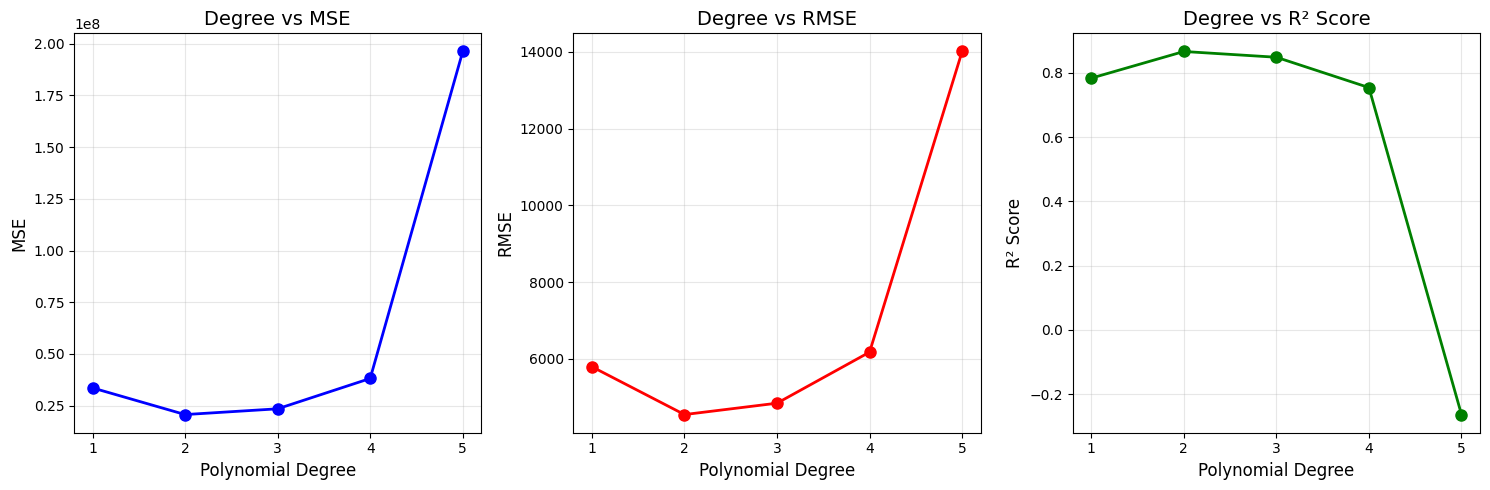

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(degrees, results_df['MSE'], 'b-o', linewidth=2, markersize=8)
axes[0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0].set_ylabel('MSE', fontsize=12)
axes[0].set_title('Degree vs MSE', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(degrees)

axes[1].plot(degrees, results_df['RMSE'], 'r-o', linewidth=2, markersize=8)
axes[1].set_xlabel('Polynomial Degree', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('Degree vs RMSE', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(degrees)

axes[2].plot(degrees, results_df['R² Score'], 'g-o', linewidth=2, markersize=8)
axes[2].set_xlabel('Polynomial Degree', fontsize=12)
axes[2].set_ylabel('R² Score', fontsize=12)
axes[2].set_title('Degree vs R² Score', fontsize=14)
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(degrees)

plt.tight_layout()
plt.show()

In [36]:
optimal_idx = results_df['R² Score'].idxmax()
optimal_degree = results_df.loc[optimal_idx, 'Degree']
optimal_r2 = results_df.loc[optimal_idx, 'R² Score']
optimal_mse = results_df.loc[optimal_idx, 'MSE']
optimal_rmse = results_df.loc[optimal_idx, 'RMSE']

print(f"Optimal Polynomial Degree: {optimal_degree}")
print(f"Optimal R² Score: {optimal_r2:.4f}")
print(f"Optimal MSE: {optimal_mse:,.2f}")
print(f"Optimal RMSE: {optimal_rmse:,.2f}")

Optimal Polynomial Degree: 2
Optimal R² Score: 0.8666
Optimal MSE: 20,712,805.99
Optimal RMSE: 4,551.13


### Justification for Optimal Degree Selection

In [37]:
print("ANALYSIS: Optimal Polynomial Degree Selection")
print(f"""
The optimal polynomial degree is {optimal_degree} based on the following observations:

1. R² Score Analysis:
   - The R² score reaches its maximum ({optimal_r2:.4f}) at degree {optimal_degree}
   - Higher R² indicates better fit to the data

2. Error Analysis:
   - MSE and RMSE are minimized at degree {optimal_degree}
   - Lower error values indicate better predictive performance

3. Model Complexity Trade-off:
   - Degree {optimal_degree} provides the best balance between model complexity and performance
""")

ANALYSIS: Optimal Polynomial Degree Selection

The optimal polynomial degree is 2 based on the following observations:

1. R² Score Analysis:
   - The R² score reaches its maximum (0.8666) at degree 2
   - Higher R² indicates better fit to the data

2. Error Analysis:
   - MSE and RMSE are minimized at degree 2
   - Lower error values indicate better predictive performance

3. Model Complexity Trade-off:
   - Degree 2 provides the best balance between model complexity and performance



### Discussion: Overfitting and Underfitting

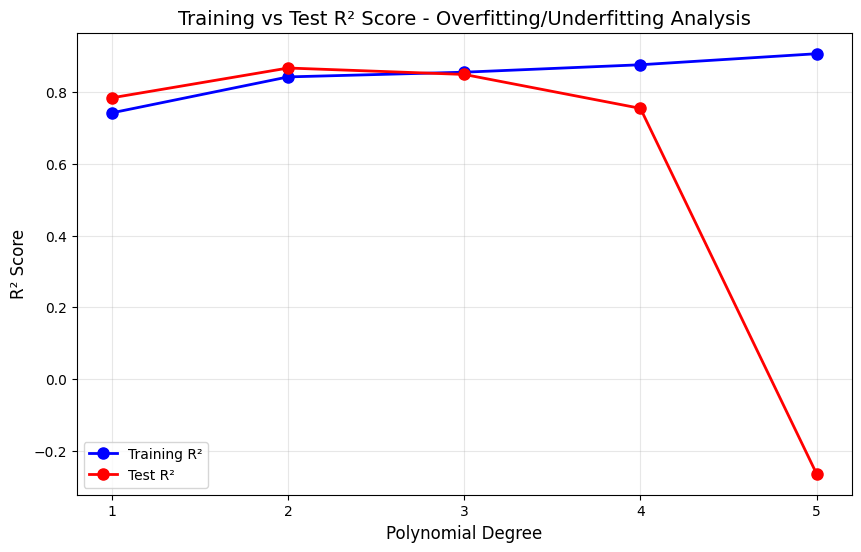

In [38]:
train_r2_scores = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    train_r2 = r2_score(y_train, y_train_pred)
    train_r2_scores.append(train_r2)

# Plot Training vs Test R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, 'b-o', label='Training R²', linewidth=2, markersize=8)
plt.plot(degrees, results_df['R² Score'].values, 'r-o', label='Test R²', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Training vs Test R² Score - Overfitting/Underfitting Analysis', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(degrees)
plt.show()

In [39]:
print("DISCUSSION: Overfitting and Underfitting")
print("""
UNDERFITTING (Low Polynomial Degree):
- Occurs when the model is too simple to capture the underlying patterns
- Low degree polynomials (d=1) may not capture non-linear relationships
- Results in high bias and low variance
- Both training and test errors are high

OVERFITTING (High Polynomial Degree):
- Occurs when the model is too complex and captures noise in the data
- High degree polynomials (d=4, 5) may fit training data too closely
- Results in low bias but high variance
- Training error is low, but test error is high
- Signs: Large gap between training and test R² scores

OPTIMAL DEGREE:
- The best degree balances bias and variance
- Provides good generalization to unseen data
- Minimizes the gap between training and test performance
""")

print("\nTraining vs Test R² Comparison:")
for i, degree in enumerate(degrees):
    gap = train_r2_scores[i] - results_df.loc[i, 'R² Score']
    print(f"Degree {degree}: Train R²={train_r2_scores[i]:.4f}, Test R²={results_df.loc[i, 'R² Score']:.4f}, Gap={gap:.4f}")

DISCUSSION: Overfitting and Underfitting

UNDERFITTING (Low Polynomial Degree):
- Occurs when the model is too simple to capture the underlying patterns
- Low degree polynomials (d=1) may not capture non-linear relationships
- Results in high bias and low variance
- Both training and test errors are high

OVERFITTING (High Polynomial Degree):
- Occurs when the model is too complex and captures noise in the data
- High degree polynomials (d=4, 5) may fit training data too closely
- Results in low bias but high variance
- Training error is low, but test error is high
- Signs: Large gap between training and test R² scores

OPTIMAL DEGREE:
- The best degree balances bias and variance
- Provides good generalization to unseen data
- Minimizes the gap between training and test performance


Training vs Test R² Comparison:
Degree 1: Train R²=0.7417, Test R²=0.7836, Gap=-0.0419
Degree 2: Train R²=0.8418, Test R²=0.8666, Gap=-0.0248
Degree 3: Train R²=0.8550, Test R²=0.8486, Gap=0.0063
Degree 4:

## Summary

In [40]:
print("POLYNOMIAL REGRESSION SUMMARY")


print(f"""
Dataset: Medical Cost Personal Dataset (Insurance)
Target Variable: charges (Medical insurance cost)
Training Samples: {X_train.shape[0]}
Testing Samples: {X_test.shape[0]}
Features Used: {X.columns.tolist()}

Best Polynomial Degree: {optimal_degree}
Best MSE: {optimal_mse:,.2f}
Best RMSE: {optimal_rmse:,.2f}
Best R² Score: {optimal_r2:.4f}
""")
best_poly_results = {
    'Degree': optimal_degree,
    'MSE': optimal_mse,
    'RMSE': optimal_rmse,
    'R2_Score': optimal_r2
}

print("\nFull Results Table:")
results_df

POLYNOMIAL REGRESSION SUMMARY

Dataset: Medical Cost Personal Dataset (Insurance)
Target Variable: charges (Medical insurance cost)
Training Samples: 1070
Testing Samples: 268
Features Used: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']

Best Polynomial Degree: 2
Best MSE: 20,712,805.99
Best RMSE: 4,551.13
Best R² Score: 0.8666


Full Results Table:


,Degree,MSE,RMSE,R² Score
0,1,3.359692e+07,5796.284659,0.783593
1,2,2.071281e+07,4551.132385,0.866583
2,3,2.349822e+07,4847.496055,0.848641
3,4,3.815850e+07,6177.256538,0.754211
4,5,1.961750e+08,14006.247327,-0.263617
